---

## Section 0｜環境檢查

開始之前，我們先確認一下今天需要的套件都有安裝好。

**為什麼要檢查版本？**
- pandas 更新很快，不同版本的語法可能會有一點點不同
- 如果你的版本跟老師不同，某些功能可能會稍微不一樣
- 通常不影響學習，但如果遇到錯誤可以先檢查版本

In [2]:
# 匯入今天會用到的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 設定 matplotlib 中文顯示（避免中文變成方塊）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # macOS
# plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False

print("✅ 所有套件匯入成功！")

✅ 所有套件匯入成功！


In [3]:
# 印出 pandas 版本
print(f"pandas 版本：{pd.__version__}")
print(f"numpy 版本：{np.__version__}")

pandas 版本：1.5.3
numpy 版本：1.23.5


---

## Section 1｜快速回顧：DataFrame 是什麼？

**DataFrame 就像 Excel 的一張表格**
- 有「列（row）」和「欄（column）」
- 每一欄可以是不同的資料類型（數字、文字、日期...）
- pandas 的核心就是這張表格

**生活化比喻：**
- **列（row）**：一筆訂單、一個學生、一次交易
- **欄（column）**：訂單金額、學生姓名、交易日期

我們先用 Python 字典（dict）來建立一個簡單的 DataFrame。

In [48]:
# 建立一個簡單的訂單資料
orders_dict = {
    'date': ['2026-01-15', '2026-01-15', '2026-01-16', '2026-01-16', '2026-01-17'],
    'order_amount': [1500, 2300, 800, 4500, 1200],
    'user_type': ['新客', '舊客', '新客', '舊客', '新客']
}

# 用 pd.DataFrame 把字典轉成 DataFrame
df = pd.DataFrame(orders_dict)

print("✅ 建立了一個 DataFrame！")

✅ 建立了一個 DataFrame！


In [49]:
# 用 head() 看前幾筆資料
df.head()

,date,order_amount,user_type
0,2026-01-15,1500,新客
1,2026-01-15,2300,舊客
2,2026-01-16,800,新客
3,2026-01-16,4500,舊客
4,2026-01-17,1200,新客


**看到了嗎？**
- 最左邊的 0, 1, 2, 3, 4 是「索引（index）」，可以想成是每一列的編號
- date, order_amount, user_type 是「欄位名稱（column names）」
- 每一列就是一筆訂單

---

## Section 2｜讀取 CSV（模擬真實公司資料）

**現實情況：**
- 在公司工作，你 90% 的資料都不是你自己產生的
- 資料可能來自：資料庫、同事給的 Excel、系統匯出的 CSV
- CSV（Comma-Separated Values）是最常見的格式

**pandas 讀取 CSV 超簡單：**
```python
df = pd.read_csv('檔案路徑/檔案名稱.csv')
```

下面我們示範一下語法（假設檔案叫 orders.csv）：

In [20]:
# 示範讀取 CSV（如果檔案存在的話）
df = pd.read_csv('orders.csv')

# 因為現在沒有真的檔案，我們繼續用剛剛建立的 df
print("💡 在真實專案中，你會用 pd.read_csv() 來讀取檔案")
print("💡 例如：df = pd.read_csv('data/orders.csv')")
print("💡 現在我們繼續用剛剛建立的 DataFrame 來練習")

💡 在真實專案中，你會用 pd.read_csv() 來讀取檔案
💡 例如：df = pd.read_csv('data/orders.csv')
💡 現在我們繼續用剛剛建立的 DataFrame 來練習


---

## Section 3｜認識資料（一定先做）

**拿到資料的第一件事：先看看它長什麼樣子**

就像你拿到一疊文件，一定會先翻一翻、看一看：
- 有幾頁？
- 內容是什麼？
- 有沒有缺頁？
- 數字大概多大？

pandas 提供了幾個超好用的函數來幫你快速認識資料。

### 3.1 df.head() - 看前幾筆

**用途：** 快速看一下資料長什麼樣子，確認欄位名稱、資料格式

**實務上：** 每次拿到新資料，第一個就是跑這個

In [21]:
# 預設顯示前 5 筆
df.head()

,date,order_amount,user_type
0,2024-01-01,1200,adult
1,2024-01-01,800,child
2,2024-01-02,1500,child
3,2024-01-02,2000,adult
4,2024-01-03,900,adult


In [22]:
# 也可以指定要看幾筆
df.head(3)

,date,order_amount,user_type
0,2024-01-01,1200,adult
1,2024-01-01,800,child
2,2024-01-02,1500,child


### 3.2 df.tail() - 看最後幾筆

**用途：** 看最後幾筆資料，確認資料有沒有被截斷

**實務上：** 有時候資料匯出會有問題，最後幾筆可能不完整

In [23]:
df.tail()

,date,order_amount,user_type
10,2024-01-06,1400,adult
11,2024-01-06,1700,adult
12,2024-01-07,2100,adult
13,2024-01-07,1900,adult
14,2024-01-08,2500,adult


### 3.3 df.sample() - 隨機看幾筆

**用途：** 隨機抽幾筆來看，避免只看到前面的資料

**實務上：** 資料可能有排序過，只看前面會有偏差

In [24]:
# 隨機顯示 3 筆
df.sample(3)

,date,order_amount,user_type
13,2024-01-07,1900,adult
11,2024-01-06,1700,adult
10,2024-01-06,1400,adult


### 3.4 df.info() - 看資料結構

**用途：** 一次看清楚：
- 有幾列（rows）、幾欄（columns）
- 每一欄的資料型別（數字、文字、日期...）
- 有沒有缺值（Non-Null Count）

**實務上：** 這個超重要！可以快速發現問題

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          15 non-null     object
 1   order_amount  15 non-null     int64 
 2   user_type     15 non-null     object
dtypes: int64(1), object(2)
memory usage: 488.0+ bytes


**解讀：**
- RangeIndex: 5 entries → 有 5 筆資料
- Data columns: 3 columns → 有 3 個欄位
- date: object → 文字格式（還不是日期格式）
- order_amount: int64 → 整數
- user_type: object → 文字

### 3.5 df.describe() - 看數值統計

**用途：** 自動幫你算好所有數值欄位的統計數字：
- count：有幾筆
- mean：平均值
- std：標準差
- min / max：最小 / 最大值
- 25% / 50% / 75%：四分位數

**實務上：** 可以快速發現異常值（例如訂單金額是負數、年齡 150 歲）

In [26]:
df.describe()

,order_amount
count,15.00000
mean,1600.00000
std,492.80538
min,800.00000
25%,1250.00000
50%,1600.00000
75%,1950.00000
max,2500.00000


**解讀：**
- 平均訂單金額是 2060 元
- 最小 800 元，最大 4500 元
- 50% 的訂單金額在 1500 元以下（中位數）

---

## Section 4｜存取資料（基礎）

**認識資料之後，接下來要學會「取出你要的資料」**

就像在 Excel 裡：
- 你可以點選某一欄
- 可以用篩選功能
- 可以排序

在 pandas 裡，這些都超簡單。

### 4.1 取出單一欄位

**語法：** `df['欄位名稱']`

**用途：** 只看某一個欄位的所有資料

In [27]:
# 取出訂單金額這一欄
df['order_amount']

0     1200
1      800
2     1500
3     2000
4      900
5     1100
6     1800
7     1300
8     2200
9     1600
10    1400
11    1700
12    2100
13    1900
14    2500
Name: order_amount, dtype: int64

In [28]:
# 取出使用者類型這一欄
df['user_type']

0     adult
1     child
2     child
3     adult
4     adult
5     adult
6     child
7     child
8     adult
9     child
10    adult
11    adult
12    adult
13    adult
14    adult
Name: user_type, dtype: object

### 4.2 排序資料 - sort_values()

**用途：** 把資料按照某個欄位排序

**生活化例子：** 找出金額最大的訂單、找出最早的日期

In [30]:
# 按照訂單金額排序（預設是由小到大）
df.sort_values('order_amount')
df.sort_values('order_amount')

,date,order_amount,user_type
1,2024-01-01,800,child
4,2024-01-03,900,adult
5,2024-01-03,1100,adult
0,2024-01-01,1200,adult
7,2024-01-04,1300,child
10,2024-01-06,1400,adult
2,2024-01-02,1500,child
9,2024-01-05,1600,child
11,2024-01-06,1700,adult
6,2024-01-04,1800,child


In [31]:
# 由大到小排序（找出最大的訂單）
df.sort_values('order_amount', ascending=False)
df.sort_values('order_amount',ascending=False)

,date,order_amount,user_type
14,2024-01-08,2500,adult
8,2024-01-05,2200,adult
12,2024-01-07,2100,adult
3,2024-01-02,2000,adult
13,2024-01-07,1900,adult
6,2024-01-04,1800,child
11,2024-01-06,1700,adult
9,2024-01-05,1600,child
2,2024-01-02,1500,child
10,2024-01-06,1400,adult


**小技巧：**
- `ascending=True`（預設）：由小到大
- `ascending=False`：由大到小

**實務應用：**
- 找出最大的訂單 → 給客服追蹤
- 找出最小的訂單 → 看是不是有問題

---

## Section 5｜loc / iloc（進階補充，有時間再看）

⚠️ **【進階補充：今天不用背】**

pandas 有兩個進階的資料存取方式：`loc` 和 `iloc`。

**差在哪？**
- `loc`：用「標籤」來選（欄位名稱、索引名稱）
- `iloc`：用「位置」來選（第幾列、第幾欄）

**今天只要知道有這兩個東西就好**，之後需要再查語法。

### 5.1 loc - 用標籤選資料

**範例：** 選出訂單金額 > 2000 的資料

In [32]:
# 用條件篩選資料
df.loc[df['order_amount'] > 2000]

,date,order_amount,user_type
8,2024-01-05,2200,adult
12,2024-01-07,2100,adult
14,2024-01-08,2500,adult


### 5.2 iloc - 用位置選資料

**範例：** 選出第 2 到第 4 列（注意：Python 從 0 開始數）

In [33]:
# 用位置選資料（第 1 到第 3 列，因為 Python 從 0 開始）
df.iloc[1:4]

,date,order_amount,user_type
1,2024-01-01,800,child
2,2024-01-02,1500,child
3,2024-01-02,2000,adult


**記住：**
- 這兩個功能很強大，但現在不用硬背
- 知道有這些工具就好，需要的時候再查

---

## Section 6｜缺值為什麼是地雷 💣（重點）

**什麼是缺值（Missing Value）？**
- 就是「沒有資料」
- 在 pandas 裡用 `NaN`（Not a Number）表示
- 也可能是 `None`、空字串、或其他形式

**為什麼缺值是地雷？**
1. 計算會出錯（平均值會跑掉）
2. 模型會無法訓練（機器學習不能有 NaN）
3. 圖表會缺一塊

**生活化例子：**
- 今天有 10 筆訂單，但有 3 筆的金額是空的
- 如果你直接算平均，結果會錯！
- 你必須先決定：要刪掉這 3 筆？還是補上一個數字？

我們來建立一個有缺值的 DataFrame 來練習。

In [34]:
# 建立一個有缺值的 DataFrame
data_with_nan = {
    'date': ['2026-01-15', '2026-01-16', '2026-01-17', '2026-01-18', '2026-01-19'],
    'order_amount': [1500, np.nan, 800, 4500, np.nan],
    'user_type': ['新客', '舊客', np.nan, '舊客', '新客']
}

df_nan = pd.DataFrame(data_with_nan)
df_nan

,date,order_amount,user_type
0,2026-01-15,1500.0,新客
1,2026-01-16,NaN,舊客
2,2026-01-17,800.0,NaN
3,2026-01-18,4500.0,舊客
4,2026-01-19,NaN,新客


**看到了嗎？**
- order_amount 有兩個 NaN
- user_type 有一個 NaN

這就是缺值。

### 6.1 檢查缺值 - isna()

**用途：** 找出哪些地方有缺值

In [35]:
# 檢查每個位置是不是 NaN（True = 是缺值）
df_nan.isna()

,date,order_amount,user_type
0,False,False,False
1,False,True,False
2,False,False,True
3,False,False,False
4,False,True,False


### 6.2 統計缺值數量 - isna().sum()

**用途：** 快速知道每個欄位有幾個缺值

In [36]:
# 計算每個欄位有幾個缺值
df_nan.isna().sum()

date            0
order_amount    2
user_type       1
dtype: int64

**解讀：**
- date 沒有缺值
- order_amount 有 2 個缺值
- user_type 有 1 個缺值

**實務上：**
- 拿到資料，一定先跑 `df.isna().sum()`
- 如果缺值太多（例如超過 50%），這個欄位可能不能用

---

## Section 7｜處理缺值 

**發現缺值之後，該怎麼辦？**

有三種常見的處理方式：
1. **刪掉（dropna）** - 直接把有缺值的列刪掉
2. **填 0（fillna(0)）** - 把缺值都填成 0
3. **填平均值（fillna(mean)）** - 把缺值填成該欄位的平均值

**沒有標準答案！要看情況！**

### 7.1 方法一：刪掉有缺值的列 - dropna()

**什麼情況適合用：**
- 缺值不多（例如只有 5%）
- 資料量夠大，刪掉一些不影響分析

**什麼情況不要亂用：**
- 缺值很多（例如 50%），刪掉會失去太多資訊
- 資料量本來就很少

In [37]:
# 刪掉有缺值的列
df_dropped = df_nan.dropna()
df_dropped

,date,order_amount,user_type
0,2026-01-15,1500.0,新客
3,2026-01-18,4500.0,舊客


**結果：**
- 原本 5 筆資料，剩下 2 筆
- 只要有任何一個欄位是 NaN，整列都被刪掉

**小心：** 資料量變少了！

### 7.2 方法二：填 0 - fillna(0)

**什麼情況適合用：**
- 缺值代表「沒有發生」（例如：沒有消費 = 0 元）
- 填 0 有業務上的意義

**什麼情況不要亂用：**
- 0 會影響平均值、總和等統計數字
- 0 可能不符合實際情況（例如：年齡不可能是 0）

In [ ]:
# 把所有缺值都填成 0
df_filled_0 = df_nan.fillna(0)
df_filled_0
df_nan.fillna(0)

,date,order_amount,user_type
0,2026-01-15,1500.0,新客
1,2026-01-16,0.0,舊客
2,2026-01-17,800.0,0
3,2026-01-18,4500.0,舊客
4,2026-01-19,0.0,新客


**結果：**
- 所有 NaN 都變成 0
- 資料量沒有變少

**但是：** user_type 變成 0 是不是怪怪的？（應該是文字才對）

### 7.3 方法三：填平均值 - fillna(mean())

**什麼情況適合用：**
- 數值欄位（金額、數量、年齡...）
- 不想影響平均值太多
- 不知道填什麼的時候，填平均值是相對安全的選擇

**什麼情況不要亂用：**
- 文字欄位（平均值沒有意義）
- 資料有明顯的分組（例如：男女平均薪資差很多，不能用全體平均）

In [39]:
# 把數值欄位的缺值填成平均值
df_filled_mean = df_nan.copy()  # 先複製一份
df_filled_mean['order_amount'] = df_nan['order_amount'].fillna(df_nan['order_amount'].mean())
df_filled_mean

,date,order_amount,user_type
0,2026-01-15,1500.000000,新客
1,2026-01-16,2266.666667,舊客
2,2026-01-17,800.000000,NaN
3,2026-01-18,4500.000000,舊客
4,2026-01-19,2266.666667,新客


**結果：**
- order_amount 的缺值被填成平均值（2266.67）
- user_type 的缺值還在（因為文字沒有平均值）

**更完整的寫法：**

In [40]:
# 更安全的寫法：只針對數值欄位填平均值
df_filled_smart = df_nan.fillna(df_nan.mean(numeric_only=True))
df_filled_smart

,date,order_amount,user_type
0,2026-01-15,1500.000000,新客
1,2026-01-16,2266.666667,舊客
2,2026-01-17,800.000000,NaN
3,2026-01-18,4500.000000,舊客
4,2026-01-19,2266.666667,新客


**小結：**
- 沒有完美的方法，要看資料和業務需求
- 實務上，可能會混用多種方法
- 重點是：要知道自己在做什麼，不要無腦套用

---

## Section 8｜最常用統計：value_counts

**value_counts() 是什麼？**
- 計算每個值出現幾次
- 超級實用！幾乎每天都會用到

**生活化例子：**
- 哪一天的訂單最多？
- 新客多還是舊客多？
- 哪個產品最暢銷？

這些問題都可以用 value_counts() 一秒解決。

In [41]:
# 先看一下我們的資料
df

,date,order_amount,user_type
0,2024-01-01,1200,adult
1,2024-01-01,800,child
2,2024-01-02,1500,child
3,2024-01-02,2000,adult
4,2024-01-03,900,adult
5,2024-01-03,1100,adult
6,2024-01-04,1800,child
7,2024-01-04,1300,child
8,2024-01-05,2200,adult
9,2024-01-05,1600,child


### 8.1 哪一天的訂單最多？

In [42]:
# 計算每個日期出現幾次
df['date'].value_counts()

2024-01-01    2
2024-01-02    2
2024-01-03    2
2024-01-04    2
2024-01-05    2
2024-01-06    2
2024-01-07    2
2024-01-08    1
Name: date, dtype: int64

**解讀：**
- 2026-01-15 和 2026-01-16 各有 2 筆訂單
- 2026-01-17 只有 1 筆訂單

**如果資料更多：**
- 你可以馬上看出哪一天是業績高峰
- 可以進一步分析為什麼

### 8.2 新客多還是舊客多？

In [43]:
# 計算每種使用者類型有幾個
df['user_type'].value_counts()

adult    10
child     5
Name: user_type, dtype: int64

**解讀：**
- 新客有 3 個
- 舊客有 2 個

**實務應用：**
- 如果新客太少，要想辦法獲客
- 如果舊客太少，要想辦法留住客戶

---

## Section 9｜groupby：公司分析的靈魂

**groupby 是什麼？**
- 把資料「分組」，然後對每一組做計算
- 這是 pandas 最強大的功能之一

**白話解釋：**
1. **分組：** 把資料按照某個欄位分成幾堆
2. **計算：** 對每一堆算一個數字（平均、總和、數量...）

**生活化例子：**
- 問題：每一天的平均訂單金額是多少？
- 步驟 1：把訂單按照日期分組
- 步驟 2：計算每一組的平均金額

就這麼簡單！

In [ ]:
# 先看一下資料
df

### 9.1 每一天的平均訂單金額

In [44]:
# 按照日期分組，計算平均訂單金額
daily_avg = df.groupby('date')['order_amount'].mean()
daily_avg

date
2024-01-01    1000.0
2024-01-02    1750.0
2024-01-03    1000.0
2024-01-04    1550.0
2024-01-05    1900.0
2024-01-06    1550.0
2024-01-07    2000.0
2024-01-08    2500.0
Name: order_amount, dtype: float64

**解讀：**
- 2026-01-15 的平均訂單金額是 1900 元
- 2026-01-16 的平均訂單金額是 2650 元
- 2026-01-17 的平均訂單金額是 1200 元

**語法拆解：**
```python
df.groupby('date')        # 按照 date 分組
  ['order_amount']        # 選擇 order_amount 這一欄
  .mean()                 # 計算平均值
```

### 9.2 每一天的訂單總金額

In [45]:
# 按照日期分組，計算訂單總金額
daily_sum = df.groupby('date')['order_amount'].sum()
daily_sum

date
2024-01-01    2000
2024-01-02    3500
2024-01-03    2000
2024-01-04    3100
2024-01-05    3800
2024-01-06    3100
2024-01-07    4000
2024-01-08    2500
Name: order_amount, dtype: int64

**實務應用：**
- 算每日營收
- 算每個產品的總銷售額
- 算每個客服人員處理的訂單數

**記住：**
- groupby 不是用來背的，是用來解決問題的
- 先想清楚你要問什麼問題，再用 groupby 來回答

---

## Section 10｜第一次視覺化（折線圖）

**為什麼要畫圖？**
- 數字看起來很抽象，圖表一看就懂
- 圖表是用來「幫你說話」的工具
- 不是裝飾，是溝通

**今天我們來畫第一張圖：每日平均訂單金額的趨勢**

我們會用到 matplotlib，這是 Python 最常用的繪圖套件。

In [ ]:
# 先用 groupby 算出每日平均訂單金額
daily_avg = df.groupby('date')['order_amount'].mean()
daily_avg

### 10.1 畫折線圖

In [ ]:
# 建立一個圖表
plt.figure(figsize=(10, 6))  # 設定圖表大小

# 畫折線圖
plt.plot(daily_avg.index, daily_avg.values, marker='o', linewidth=2, color='#2E86AB')

# 加上標題和標籤
plt.title('每日平均訂單金額趨勢', fontsize=16, fontweight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('平均訂單金額（元）', fontsize=12)

# 加上網格線（讓數字更好看）
plt.grid(True, alpha=0.3)

# 顯示圖表
plt.tight_layout()
plt.show()

**程式碼解說：**
- `plt.figure(figsize=(10, 6))`：設定圖表大小（寬 10 吋、高 6 吋）
- `plt.plot()`：畫折線圖
  - `marker='o'`：每個點加上圓圈
  - `linewidth=2`：線條粗細
  - `color='#2E86AB'`：線條顏色
- `plt.title()`：標題
- `plt.xlabel()` / `plt.ylabel()`：X 軸和 Y 軸的標籤
- `plt.grid(True, alpha=0.3)`：加上網格線，透明度 0.3
- `plt.show()`：顯示圖表

**從這張圖可以看出：**
- 1月16日的平均訂單金額最高
- 1月17日下降了
- 趨勢一目了然！

**記住：**
- 圖表要有標題、標籤
- 不要讓人猜你在畫什麼
- 簡單清楚最重要

---

## Section 11｜小試身手（課堂練習）

**現在輪到你了！**

用今天學到的技巧，試著完成以下任務：

### 練習 1：找出平均訂單金額最高的一天
- 提示：用 groupby 和 sort_values
- 目標：找出哪一天的平均訂單金額最高

### 練習 2：嘗試自己畫一張圖
- 畫出「每日訂單總金額」的折線圖
- 提示：用 groupby 的 sum() 而不是 mean()

### 練習 3：如果你是老闆，你會問什麼？
- 想一想，從這些資料裡，你還想知道什麼？
- 新客和舊客的平均訂單金額有差嗎？
- 哪一天的新客最多？
- 試著用今天學到的工具來回答

---

**不要怕錯！**
- 寫程式最快的學習方式就是：試錯
- 不會就查，查不到就問
- 沒有人一開始就會的

In [50]:
df

,date,order_amount,user_type
0,2026-01-15,1500,新客
1,2026-01-15,2300,舊客
2,2026-01-16,800,新客
3,2026-01-16,4500,舊客
4,2026-01-17,1200,新客


In [60]:
# 在這裡試試看！
### 練習 1：找出平均訂單金額最高的一天
# - 提示：用 groupby 和 sort_values
# - 目標：找出哪一天的平均訂單金額最高
day_avg = df.groupby('date')['order_amount'].mean().sort_values(ascending=False)
print(day_avg)

date
2026-01-16    2650.0
2026-01-15    1900.0
2026-01-17    1200.0
Name: order_amount, dtype: float64


Text(0.5, 1.0, 'daily amount')

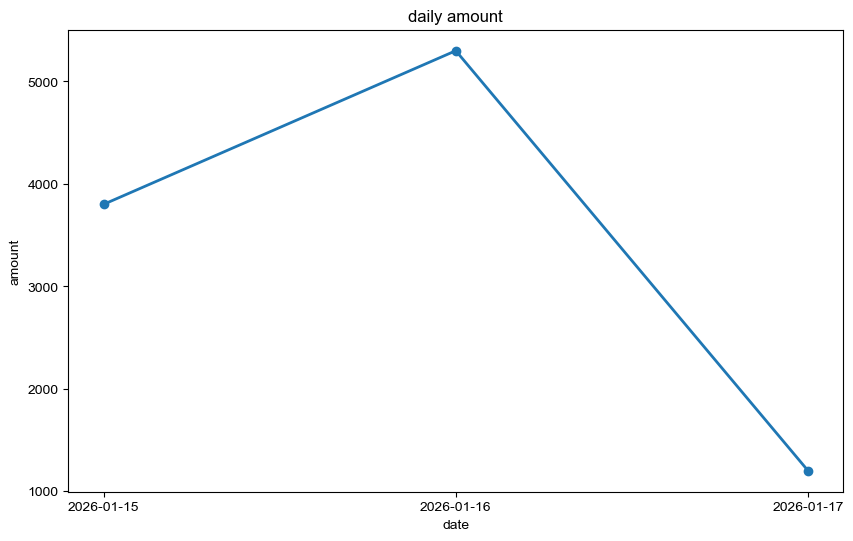

In [65]:
### 練習 2：嘗試自己畫一張圖
# - 畫出「每日訂單總金額」的折線圖
# - 提示：用 groupby 的 sum() 而不是 mean()
day_sum = df.groupby('date')['order_amount'].sum()
plt.figure(figsize=(10,6))
plt.plot(day_sum.index, day_sum.values, marker = 'o', linewidth=2, markersize=6)
plt.xlabel('date')
plt.ylabel('amount')
plt.title('daily amount')

user_type
新客    1166.666667
舊客    3400.000000
Name: order_amount, dtype: float64


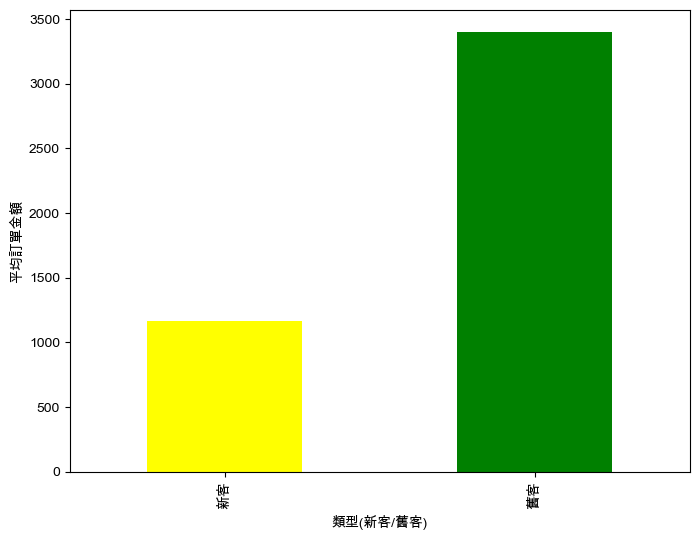

In [70]:
### 練習 3：如果你是老闆，你會問什麼？
# - 想一想，從這些資料裡，你還想知道什麼？
# - 新客和舊客的平均訂單金額有差嗎？
user_type_avg = df.groupby('user_type')['order_amount'].mean()
print(user_type_avg)

plt.figure(figsize=(8,6))
user_type_avg.plot(kind='bar', color=['yellow','green'] )
plt.xlabel('類型(新客/舊客)')
plt.ylabel('平均訂單金額')
plt.show()
# - 哪一天的新客最多？
user_type_new = df.loc[df['user_type'] == '新客']
# daily_user_type = df.groupby('date')['user_type_new'].count()
# print(daily_user_type)
# - 試著用今天學到的工具來回答 df.loc[df['order_amount'] > 2000]


---

## Section 12｜小試身手參考解答（老師用）

**這裡提供參考解答，但不是唯一答案！**

程式碼有很多種寫法，只要能達成目標就是好的解法。

### 練習 1 解答：找出平均訂單金額最高的一天

In [ ]:
# 方法 1：用 groupby + sort_values
daily_avg = df.groupby('date')['order_amount'].mean()
daily_avg_sorted = daily_avg.sort_values(ascending=False)
print("平均訂單金額最高的一天：")
print(daily_avg_sorted.head(1))

In [ ]:
# 方法 2：用 idxmax() 直接找最大值的索引
daily_avg = df.groupby('date')['order_amount'].mean()
best_day = daily_avg.idxmax()
best_amount = daily_avg.max()
print(f"平均訂單金額最高的一天是：{best_day}，金額：{best_amount:.0f} 元")

### 練習 2 解答：畫出每日訂單總金額的折線圖

In [ ]:
# 先算出每日總金額
daily_sum = df.groupby('date')['order_amount'].sum()

# 畫折線圖
plt.figure(figsize=(10, 6))
plt.plot(daily_sum.index, daily_sum.values, marker='s', linewidth=2, color='#A23B72')
plt.title('每日訂單總金額趨勢', fontsize=16, fontweight='bold')
plt.xlabel('日期', fontsize=12)
plt.ylabel('訂單總金額（元）', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 練習 3 解答：新客和舊客的平均訂單金額

In [ ]:
# 按照使用者類型分組，計算平均訂單金額
user_type_avg = df.groupby('user_type')['order_amount'].mean()
print("新客 vs 舊客的平均訂單金額：")
print(user_type_avg)

In [ ]:
# 也可以用長條圖來呈現
plt.figure(figsize=(8, 6))
user_type_avg.plot(kind='bar', color=['#F18F01', '#006E90'])
plt.title('新客 vs 舊客的平均訂單金額', fontsize=16, fontweight='bold')
plt.xlabel('使用者類型', fontsize=12)
plt.ylabel('平均訂單金額（元）', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

**觀察：**
- 舊客的平均訂單金額比新客高
- 這是合理的，因為舊客比較熟悉產品，更願意花錢
- 如果你是老闆，可能會想辦法提高新客的客單價

---

## Section 13｜進階補充（今天不用會）

⚠️ **這部分是進階內容，今天不用硬背**

只是讓你知道 pandas 還有這些功能，之後需要再深入學習。

**後面專案課會再教！**

### 13.1 merge / concat - 合併資料表

**用途：** 把兩張表格合併成一張

**生活化例子：**
- 有一張訂單表、一張客戶表
- 你想把客戶的年齡、性別加到訂單表裡
- 就需要用 merge

In [47]:
# 示意碼（不會真的執行）
# df_merged = pd.merge(df_orders, df_customers, on='user_id', how='left')

print("💡 merge 可以把兩張表格合併")
print("💡 就像 Excel 的 VLOOKUP")
print("💡 後面專案課會再教！")

💡 merge 可以把兩張表格合併
💡 就像 Excel 的 VLOOKUP
💡 後面專案課會再教！


### 13.2 apply / lambda - 自訂計算邏輯

**用途：** 對每一列或每一欄做自訂的計算

**生活化例子：**
- 如果訂單金額 > 3000，標記為「大單」
- 如果訂單金額 < 1000，標記為「小單」

In [ ]:
# 示意碼
# df['order_size'] = df['order_amount'].apply(lambda x: '大單' if x > 3000 else '小單')

print("💡 apply 可以自訂計算邏輯")
print("💡 lambda 是匿名函數的寫法")
print("💡 後面專案課會再教！")

### 13.3 pivot_table - 樞紐分析表

**用途：** 製作 Excel 的樞紐分析表

**生活化例子：**
- 想看「每一天 × 每一種使用者類型」的訂單總金額
- 就像 Excel 的樞紐分析表一樣

In [ ]:
# 示意碼
# pivot = pd.pivot_table(df, values='order_amount', index='date', columns='user_type', aggfunc='sum')

print("💡 pivot_table 可以做樞紐分析")
print("💡 功能超強大，但語法稍微複雜一點")
print("💡 後面專案課會再教！")

---

## Section 14｜Lesson 總結

**恭喜你！今天學會了 pandas 的核心操作！**

### 今天學了什麼？

1. **DataFrame 的基本概念**
   - 就像 Excel 表格，有列和欄
   - 用 pd.read_csv() 讀取資料

2. **認識資料的工具**
   - head() / tail() / sample() - 快速瀏覽
   - info() / describe() - 了解資料結構和統計

3. **處理缺值**
   - 用 isna() 檢查缺值
   - 用 dropna() / fillna() 處理缺值

4. **資料分析核心技巧**
   - value_counts() - 計算出現次數
   - groupby() - 分組統計（超重要！）
   - sort_values() - 排序資料

5. **視覺化**
   - 用 matplotlib 畫折線圖
   - 記得加標題、標籤、網格線

---

### 最重要的心態

**pandas 是用來幫你回答問題的工具**
- 不是用來背語法的
- 先想清楚問題，再找工具

**今天的目標：不怕資料**
- 拿到資料不要慌
- 先 head()、info()、describe() 看一看
- 再用 groupby、value_counts 開始分析

**下一步：**
- 多練習！用真實的資料來玩玩看
- 遇到問題就查文件、查 Google
- 後面的專案課會帶你做更完整的分析

---

### 推薦資源

- [pandas 官方文件](https://pandas.pydata.org/docs/)
- [pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

---

**加油！你已經跨出資料分析的第一步了！** 🎉